# Ensemble Learning for Fraud Detection

In this video, we will walk through a comprehensive process of applying unsupervised machine learning alogrithms using real-life data. We will train test and evaluate the following algorithms:

Bagging

Random Forest

AdaBoost

Gradient Boosting
XGBoost
Stacking
Votin

# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Import the dataset

In [2]:
# Load data into pandas DataFrame
df = pd.read_csv('C:/Users/Amarkou/Documents/Ecourse/creditcard.csv')
# Select the first 30,000 rows of the DataFrame
df = df.head(30000)

# Split data into training and testing sets

In [4]:
# Split the dataset into features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a function to train, evaluate, and visualize the performance of each model:

In [5]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"ROC-AUC Score: {roc_auc}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    return model

Accuracy: 0.9991111111111111
F1 Score: 0.8709677419354839
ROC-AUC Score: 0.908979389073066

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8967
           1       0.93      0.82      0.87        33

    accuracy                           1.00      9000
   macro avg       0.97      0.91      0.94      9000
weighted avg       1.00      1.00      1.00      9000



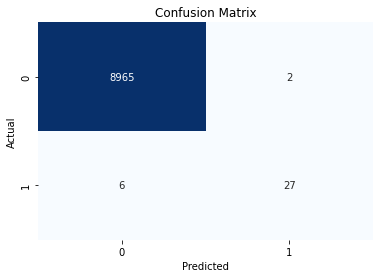

Accuracy: 0.999
F1 Score: 0.8474576271186441
ROC-AUC Score: 0.8787321187789572

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8967
           1       0.96      0.76      0.85        33

    accuracy                           1.00      9000
   macro avg       0.98      0.88      0.92      9000
weighted avg       1.00      1.00      1.00      9000



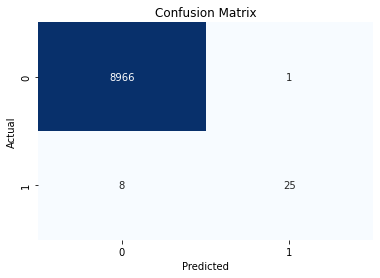

Accuracy: 0.999
F1 Score: 0.8524590163934426
ROC-AUC Score: 0.8938278739215507

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8967
           1       0.93      0.79      0.85        33

    accuracy                           1.00      9000
   macro avg       0.96      0.89      0.93      9000
weighted avg       1.00      1.00      1.00      9000



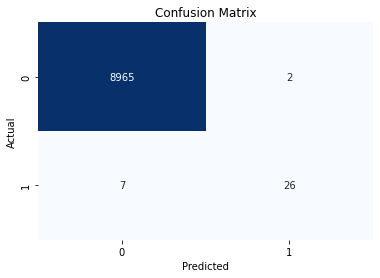

Accuracy: 0.9982222222222222
F1 Score: 0.7714285714285715
ROC-AUC Score: 0.9085333090016932

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8967
           1       0.73      0.82      0.77        33

    accuracy                           1.00      9000
   macro avg       0.86      0.91      0.89      9000
weighted avg       1.00      1.00      1.00      9000



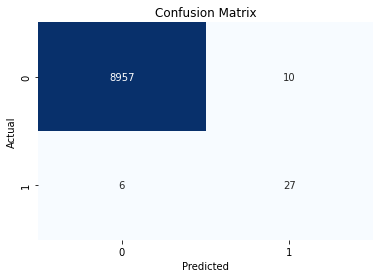

Accuracy: 0.9994444444444445
F1 Score: 0.9180327868852458
ROC-AUC Score: 0.9242424242424243

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8967
           1       1.00      0.85      0.92        33

    accuracy                           1.00      9000
   macro avg       1.00      0.92      0.96      9000
weighted avg       1.00      1.00      1.00      9000



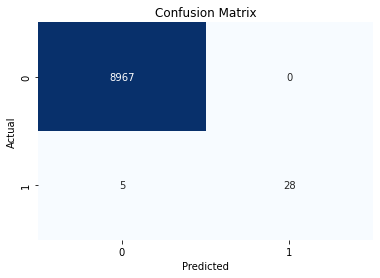

In [6]:
# Bagging
bagging = BaggingClassifier()
bagging = train_and_evaluate_model(bagging, X_train, y_train, X_test, y_test)

# Random Forest
random_forest = RandomForestClassifier()
random_forest = train_and_evaluate_model(random_forest, X_train, y_train, X_test, y_test)

# AdaBoost
adaboost = AdaBoostClassifier()
adaboost = train_and_evaluate_model(adaboost, X_train, y_train, X_test, y_test)

# Gradient Boosting
gradient_boosting = GradientBoostingClassifier()
gradient_boosting = train_and_evaluate_model(gradient_boosting, X_train, y_train, X_test, y_test)

# XGBoost
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgboost = train_and_evaluate_model(xgboost, X_train, y_train, X_test, y_test)

# Do the same process for Stacking and Voting

In [7]:
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [8]:
def train_and_evaluate_ensemble_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"ROC-AUC Score: {roc_auc}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


# Determine the base models

In [9]:
# Base models
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(probability=True)

base_models = [
    ('logistic_regression', lr),
    ('decision_tree', dt),
    ('support_vector_machine', svm),
]


Stacking Classifier:
Accuracy: 0.998
F1 Score: 0.64
ROC-AUC Score: 0.7423684824153208

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8967
           1       0.94      0.48      0.64        33

    accuracy                           1.00      9000
   macro avg       0.97      0.74      0.82      9000
weighted avg       1.00      1.00      1.00      9000



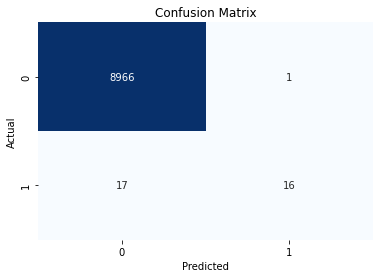

In [10]:
# Stacking
meta_model = LogisticRegression()
stacking = StackingClassifier(estimators=base_models, final_estimator=meta_model)
print("Stacking Classifier:")
stacking = train_and_evaluate_ensemble_model(stacking, X_train, y_train, X_test, y_test)


Voting Classifier:
Accuracy: 0.9977777777777778
F1 Score: 0.5652173913043478
ROC-AUC Score: 0.696969696969697

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8967
           1       1.00      0.39      0.57        33

    accuracy                           1.00      9000
   macro avg       1.00      0.70      0.78      9000
weighted avg       1.00      1.00      1.00      9000



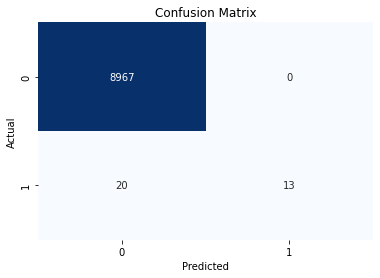

In [11]:
# Voting
voting = VotingClassifier(estimators=base_models, voting='soft')
print("Voting Classifier:")
voting = train_and_evaluate_ensemble_model(voting, X_train, y_train, X_test, y_test)
